# GWP_3 : Statistical Risk


## Introduction  

In the world of finance, risk refers to degree of uncertainity leading to potential financial loss in a portfolio. An investor needs to know and be prepared of all kind of risks which could affect the return on the investment. There could be so many sources of risks in an investment which are broadly classified as Credit Risk, Market Risk, Climate Risk, Operational Risk, Risk due to upfront market shock, Liquidity Risk etc. Some of them can be quantified mathematically/ statisticaly whereas some of them can be qualitative. In this project, we will discuss about some statistical methods to capture/ quantify risk.

## Statistical Risk  

The foundation of measuring financial risk has been mathematical. Mathematical tools and Statistical techniques are used to measure different types of risks on investment. For example, Value at Risk captures is measured using several Statistical methods which helps to capture the risk in an investment due to market movements. Capital Asset Pricing Models are developed statisticallly which is used to calculate the market implied probability of default. Apart from these models, studying certain statistical measures like variance, correlation etc. help in portfolio construction by computing and comparing risks.  

Let us look into few of these closely.

### Volatility  

Volatility is a measure of dispersion which helps determining risk in certain asset or portfolio. While creating portfolio of assets, we want to ensure maximum return with minimum risk.  There could be certain asset like cryptocurrencies which are likely to give great return on investment but at the same time these assets are highly risky. If we observe the price time series of a cryptocurrency (BTC, say), it is observed to be extremely volatile which brings uncertainity and risk in portfolio.  
Volatility can be measured by computing several statistical measures on the price returns of an asset. Such measures are :  
* Standard Deviation
* Variance
* Semi-deviation
* Semi-variance
* Mean absolute deviation
etc.  

#### Variance :  
Let, $ r_i $ be the price return at time point $i$. The return variance is defined as :
\begin{equation}
s^2 = \frac{1}{n-1}\sum\limits_{i = 1}^n {\left( {r_i - \bar r} \right)^2 }
\end{equation}
This serves as a measure of volatility of a time series.  

#### Standard Deviation :
Standard deviation is defined as square root of the variance which makes the unit of the measure same as that off return. Let, $ r_i $ be the price return at time point $i$. The return standard-deviation is defined as :  
\begin{equation}
s^2 = \sqrt { \frac{1}{n-1}\sum\limits_{i = 1}^n {\left( {r_i - \bar r} \right)^2 } }
\end{equation}  

#### Semi-Variance :  
Semi-variance is another measure of dispersion which only considers the downside risk. Hence, it only sums up the squares of returns which are below the average return. Let, $ r_i $ be the price return at time point $i$. The semi-variance of the returns is defined as :
\begin{equation}
semi-variance = \frac{1}{n-1}\sum\limits_{i = 1 \\ r_i < \bar r}^n {\left( {r_i - \bar r} \right)^2 }
\end{equation}  

#### Semi-Deviation :
This too captures the downside risk only in the same unit as the returns. This computed by taking square root of the Semi-Varoance.
\begin{equation}
semi-deviation = \sqrt { \frac{1}{n-1}\sum\limits_{i = 1 \\ r_i < \bar r}^n {\left( {r_i - \bar r} \right)^2 } }
\end{equation}  

#### Mean Absolute Deviation
This captures the  volatility by averaging the absolute deviation of the returns from their avarage. Here is how it is calculated.
\begin{equation}
Mean Absolute Deviation = \frac{1}{n-1}\sum\limits_{i = 1}^n {|{r_i - \bar r|}}
\end{equation}  


**Usefulness of volatility in portfolio creation**  

Higher the measure of volatility, riskier the asset would be. An investor might pre-fix a threshold of volatility while constructing a portfolio. If there are two assets with similar daily return but one of them has high volatility, one would like to discard from the portfolio.  
As we all know, higher risk yields higher return. Then what if an investor thinks a risky asset has a huge potential of price inflation? The investor might be willing to keep it in the portfolio anyways. In such cases, one should choose other assets in the portfolio such a way that, the over all volatility of the portfolio comes down. This can be achieved by **diversification**.


### Correlation  

Correlation is a statistical measure that captures the measure of association between two variables. In portfolio selection, the investor always tries to diversify the portfolio in order to achieve lower volatility which bets lower risk. Choosing multplie assets in a portfolio with as less correlation as possible, helps in diversification. Correlation of a bivariate data can be measured using below methods.

#### Pearson Correlation Coefficient
Let $(x_i, y_i),   \forall i=1(1)n$ be a bivariate data. The Pearson correlation coefficient is calculated as :
\begin{equation}
\rho_{x,y} = \frac {Cov(x, y)} {Var(x)}
\end{equation}
where,  
\begin{equation}
Cov(x, y) = \frac{1}{n}\sum\limits_{i = 1}^n { \left( {x_i - \bar x} \right) \left( {y_i - \bar y} \right) }
\end{equation}

This measure computes the extent of linear relationship between variables. This measure fails to capture non-linear relationships.

#### Spearman's Rank Correlation Coefficient
This is a rank based measure of association between two variables. It captures at which extent two variables are moving in the same derection.
Let $(x_i, y_i),   \forall i=1(1)n$ be a bivariate data. The Spearman correlation coefficient is calculated as :
\begin{equation}
\rho = 1- {\frac {6 \sum d_i^2}{n(n^2 - 1)}}
\end{equation}
where,  
$d_i$ = the pairwise distances of the ranks of the variables $x_i$ and $y_i$

#### Kendal's Rank Correlation Coefficient
This is measure of correlation which is similar to the Spearman's correlation coefficient, capturing the extent of association at which the variables are moving together.
The Kendal's correlation coefficient is calculated as :
\begin{equation}
\tau = \frac{c-d}{c+d}
\end{equation}
where,  
c = the number of concordant pairs  
d = the number of discordant pairs

Thus, by studying volatility and correlation of assets, one can asses the risk in a portfolio. 

### Value at Risk  

Value at Risk is a measure of potential risk in a portfolio

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from scipy.signal import correlate
from scipy.stats import norm

In [214]:
tesla = yf.download('TSLA', start="2013-09-14", end="2017-09-05")
del tesla["Volume"]
tesla = tesla.reset_index(drop=True)
tesla

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close
0,11.200000,11.390000,11.056667,11.105333,11.105333
1,11.005333,11.228000,10.890667,11.082000,11.082000
2,11.138000,11.163333,10.946667,11.081333,11.081333
3,11.386667,12.031333,11.272000,11.861333,11.861333
4,11.926667,12.388667,11.904000,12.226000,12.226000
...,...,...,...,...,...
995,23.152000,23.156668,22.648001,23.044001,23.044001
996,22.632000,23.270000,22.583332,23.157333,23.157333
997,23.311333,23.564667,23.133333,23.545334,23.545334
998,23.570000,23.896000,23.521334,23.726667,23.726667


In [215]:
tesla["Daily Returns"] = np.log(tesla["Adj Close"] / tesla["Adj Close"].shift(1))
tesla

,Open,High,Low,Close,Adj Close,Daily Returns
0,11.200000,11.390000,11.056667,11.105333,11.105333,NaN
1,11.005333,11.228000,10.890667,11.082000,11.082000,-0.002103
2,11.138000,11.163333,10.946667,11.081333,11.081333,-0.000060
3,11.386667,12.031333,11.272000,11.861333,11.861333,0.068022
4,11.926667,12.388667,11.904000,12.226000,12.226000,0.030281
...,...,...,...,...,...,...
995,23.152000,23.156668,22.648001,23.044001,23.044001,-0.006890
996,22.632000,23.270000,22.583332,23.157333,23.157333,0.004906
997,23.311333,23.564667,23.133333,23.545334,23.545334,0.016616
998,23.570000,23.896000,23.521334,23.726667,23.726667,0.007672


In [216]:
variance = tesla["Daily Returns"].var()
std = tesla["Daily Returns"].std()
print(f"Variance: {variance}\nStandard Deviation: {std}")

Variance: 0.0007503685604357123
Standard Deviation: 0.027392856010933074


In [217]:
bitcoin = pd.read_csv("bitcoin_price.csv")[::-1][-1000:]
bitcoin = bitcoin.reset_index(drop=True)
del bitcoin["Volume"], bitcoin["Market Cap"]
bitcoin

,Date,Open,High,Low,Close
0,"Dec 11, 2014",344.34,361.36,338.76,350.51
1,"Dec 12, 2014",350.83,352.98,349.29,352.54
2,"Dec 13, 2014",352.38,352.38,346.59,347.38
3,"Dec 14, 2014",346.73,353.32,345.42,351.63
4,"Dec 15, 2014",351.36,351.81,344.93,345.35
...,...,...,...,...,...
995,"Sep 01, 2017",4701.76,4892.01,4678.53,4892.01
996,"Sep 02, 2017",4901.42,4975.04,4469.24,4578.77
997,"Sep 03, 2017",4585.27,4714.08,4417.59,4582.96
998,"Sep 04, 2017",4591.63,4591.63,4108.40,4236.31


In [218]:
bitcoin["Daily Returns"] = np.log(bitcoin["Close"] / bitcoin["Close"].shift(1))
bitcoin

,Date,Open,High,Low,Close,Daily Returns
0,"Dec 11, 2014",344.34,361.36,338.76,350.51,NaN
1,"Dec 12, 2014",350.83,352.98,349.29,352.54,0.005775
2,"Dec 13, 2014",352.38,352.38,346.59,347.38,-0.014745
3,"Dec 14, 2014",346.73,353.32,345.42,351.63,0.012160
4,"Dec 15, 2014",351.36,351.81,344.93,345.35,-0.018021
...,...,...,...,...,...,...
995,"Sep 01, 2017",4701.76,4892.01,4678.53,4892.01,0.039320
996,"Sep 02, 2017",4901.42,4975.04,4469.24,4578.77,-0.066173
997,"Sep 03, 2017",4585.27,4714.08,4417.59,4582.96,0.000915
998,"Sep 04, 2017",4591.63,4591.63,4108.40,4236.31,-0.078652


In [219]:
variance = bitcoin["Daily Returns"].var()
std = bitcoin["Daily Returns"].std()
print(f"Variance: {variance}\nStandard Deviation: {std}")

Variance: 0.0012027988293614403
Standard Deviation: 0.034681390245511215


### Calculating Downside Risk of an asset

In [220]:
tsla_avg_ret = tesla["Daily Returns"].mean()
tsla_avg_ret

0.0007585267405046777

In [221]:
returns = tesla["Daily Returns"]
tsla_above_avg = returns[returns > tsla_avg_ret]
tsla_semi_variance = np.mean((tsla_above_avg - tsla_avg_ret)**2)
tsla_semi_variance

0.0007295590527161446

In [222]:
bitcoin_return = bitcoin["Daily Returns"]
btc_avg_ret = bitcoin_return.mean()
btc_avg_ret

0.0025271493645680843

In [223]:
returns = bitcoin["Daily Returns"]
btc_above_avg = returns[returns > btc_avg_ret]
btc_semi_variance = np.mean((btc_above_avg - btc_avg_ret)**2)
btc_semi_variance

0.0010758322890453934

In [224]:
tsla_semi_dev = tsla_semi_variance **1/2
btc_semi_dev = btc_semi_variance**1/2
tsla_semi_dev
btc_semi_dev

0.0005379161445226967

In [225]:
tsla_mean_dev = np.mean(np.abs(tsla_above_avg - tsla_avg_ret))
btc_mean_dev = np.mean(np.abs(btc_above_avg - btc_avg_ret))
tsla_mean_dev, btc_mean_dev

(0.019328082653753752, 0.022109108087103677)

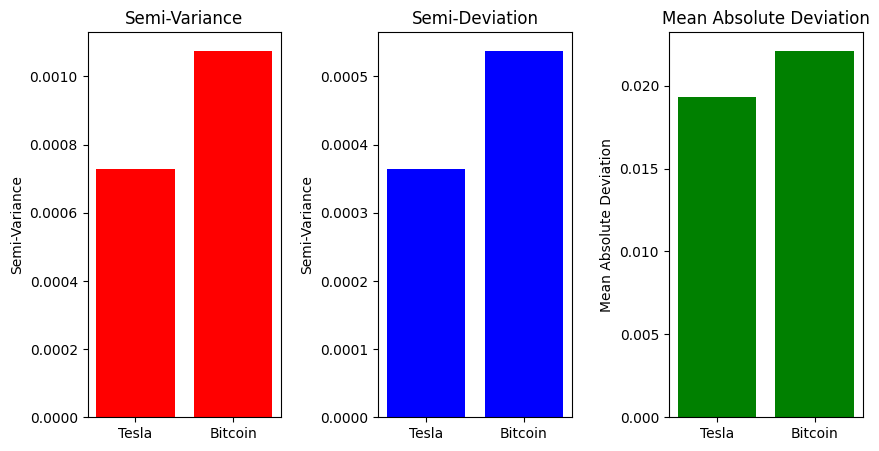

In [226]:
fig, axs = plt.subplots(1, 3, figsize=(10,5))

axs[0].bar(["Tesla", "Bitcoin"], [tsla_semi_variance, btc_semi_variance], color='red')
axs[0].set_title("Semi-Variance")
axs[0].set_ylabel("Semi-Variance")

axs[1].bar(["Tesla", "Bitcoin"], [tsla_semi_dev, btc_semi_dev], color='blue')
axs[1].set_title("Semi-Deviation")
axs[1].set_ylabel("Semi-Variance")

axs[2].bar(["Tesla", "Bitcoin"], [tsla_mean_dev, btc_mean_dev], color='green')
axs[2].set_title("Mean Absolute Deviation")
axs[2].set_ylabel("Mean Absolute Deviation")

fig.subplots_adjust(wspace=0.5)

plt.show()

### Calculating the correlation between two assets

In [228]:
tesla["change(in %)"] = tesla["Adj Close"].pct_change()
bitcoin["change(in %)"] = bitcoin["Close"].pct_change()
tesla["change(in %)"].corr(bitcoin["change(in %)"], method='pearson')

-0.01088786598963826

In [ ]:
corr = np.corrcoef(x, y)[0, 1]

# create scatter plot
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f'Scatter Plot (correlation = {corr:.2f})')
plt.show()

In [229]:
tesla["change(in %)"].corr(bitcoin["change(in %)"], method='spearman')

-0.06477353525300912

In [257]:
tesla["change(in %)"].corr(bitcoin["change(in %)"], method='kendall')

-0.0425596363494333

In [256]:
weights = np.array([0.5, 0.5]) 
portfolio_returns = np.dot(weights, [tesla['Daily Returns'], bitcoin['Daily Returns']])
portfolio_returns = np.nan_to_num(portfolio_returns, nan=0)
portfolio_mean = np.mean(portfolio_returns)
portfolio_std = np.std(portfolio_returns)

confidence_level = 0.95 
time_horizon = 1  
z_score = norm.ppf(confidence_level)
portfolio_var = portfolio_mean - z_score * portfolio_std * np.sqrt(time_horizon)
portfolio_var

-0.034455535160397475